# Modeling Credit Card Approval Data Using ANN
Several credit card applications are received by banks and other financial institutions all year round. Whether a customer's application is approved or not depends on several factors like income, employment status, age, credit worthiness among others. It's impossible to analyze these applications manually. Machine Learning models provide an automated process of approving or rejecting credit card applications. 

In this project, we analyze and predit the approval ratings of credit cards with respect to features including gender, age, debt, married, bank customer, industry, ethnicity, years employed, prior default, employed, credit score, driver's license, citizen, zipcode, income and approved (target feature) using a deep learning model (Artificial Neural Network (ANN)). We use precision, recall, f1-score to measure performance of our ANN model.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

### Loading the Data

In [6]:
data = pd.read_csv("clean_creditcard.csv", sep = ",")
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [7]:
newdata = data.drop('Approved', axis = 'columns')
Target = data['Approved']

#### Data PreProcessing 
First, we convert all the non-numeric data features into numeric values so that we can utilize the SciKit Learn ML library. SKLearn only uses numeric data. Label encoding in the SKLearn library will be used to do the conversion.

In [8]:
from sklearn.preprocessing import LabelEncoder
LabEnc = LabelEncoder()
for i in data:
    if data[i].dtypes == "object":
        LabEnc.fit(data[i])
        data[i] = LabEnc.transform(data[i])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    int64  
 6   Ethnicity       690 non-null    int64  
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    int64  
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


#### Number of Credit Card Approvals

In [11]:
data[data.Approved == 1]

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,0,43,560,1
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,1,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,1,20.50,2.415,1,1,4,4,2.00,1,1,11,1,0,200,3000,1
600,0,29.50,0.460,1,1,5,4,0.54,1,1,4,0,0,380,500,1
606,1,16.17,0.040,1,1,4,4,0.04,0,0,0,0,0,0,0,1
621,1,22.67,0.165,1,1,4,3,2.25,0,0,0,1,1,0,0,1


#### Visualization of Credit Card Approvals Based on Years of Employment

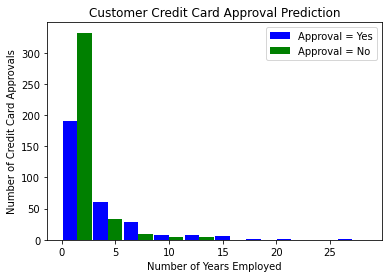

In [22]:
yrsEmp_yes_approval = data[data.Approved == 1].YearsEmployed
yrsEmp_no_approval  = data[data.Approved == 0].YearsEmployed

plt.xlabel("Number of Years Employed")
plt.ylabel("Number of Credit Card Approvals")
plt.title("Customer Credit Card Approval Prediction")

plt.hist([yrsEmp_yes_approval, yrsEmp_no_approval], rwidth = 0.95, color = ['blue', 'green'], label = ['Approval = Yes', 'Approval = No'])
plt.legend()

Observe from the histogram above that, the approval rating of customers that have been employed for more than two years is high compared to credit card application denials. Meanwhile, customers with less than 2 and half years receive twice as much denials as approvals.

#### Visualization of Credit Card Approvals Based on Income

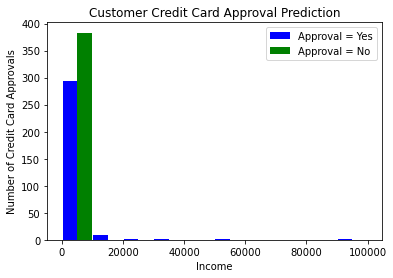

In [23]:
income_yes_approval = data[data.Approved == 1].Income
income_no_approval  = data[data.Approved == 0].Income

plt.xlabel("Income")
plt.ylabel("Number of Credit Card Approvals")
plt.title("Customer Credit Card Approval Prediction")

plt.hist([income_yes_approval, income_no_approval], rwidth = 0.95, color = ['blue', 'green'], label = ['Approval = Yes', 'Approval = No'])
plt.legend()

Observe from the histogram above that, the approval rating of customers who earn more than USD10,000 is high compared to credit card application denials. Meanwhile, customers who earn less than USD10,000 receive more credit card application denials than approvals.

#### Splitting Data

In [26]:
X = data.drop('Approved', axis = 'columns')
y = data['Approved']

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25)

#### Rescaling Data
We now rescale the observations of the various features to range between 0 and 1. 

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
rescaled_Xtest = scaler.fit_transform(Xtest)
rescaled_Xtrain = scaler.fit_transform(Xtrain)

In [41]:
rescaled_Xtrain.shape

(517, 15)

In [42]:
rescaled_Xtest.shape

(173, 15)

### Building ANN model in Tensorflow/Keras

In [37]:
import tensorflow as tf
from tensorflow import keras

ANNmodel = keras.Sequential([
    keras.layers.Dense(15, input_shape = (15, ), activation = 'relu'),
    keras.layers.Dense(10, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

ANNmodel.compile(optimizer = 'adam', 
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

ANNmodel.fit(rescaled_Xtrain, ytrain, epochs = 90)

Epoch 1/90
17/17 [==============================] - 0s 943us/step - loss: 0.7634 - accuracy: 0.5590
Epoch 2/90
17/17 [==============================] - 0s 1ms/step - loss: 0.7239 - accuracy: 0.5493
Epoch 3/90
17/17 [==============================] - 0s 1ms/step - loss: 0.7035 - accuracy: 0.5551
Epoch 4/90
17/17 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5745
Epoch 5/90
17/17 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.6093
Epoch 6/90
17/17 [==============================] - 0s 1ms/step - loss: 0.6567 - accuracy: 0.6286
Epoch 7/90
17/17 [==============================] - 0s 1ms/step - loss: 0.6350 - accuracy: 0.6731
Epoch 8/90
17/17 [==============================] - 0s 1ms/step - loss: 0.6040 - accuracy: 0.7602
Epoch 9/90
17/17 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.8104
Epoch 10/90
17/17 [==============================] - 0s 1ms/step - loss: 0.5160 - accuracy: 0.8433
Epoch 11/90
17/17

Observe, that our ANN model achieves 89% accuracy level with a low loss of 0.27 of the training ANN model. The accuracy for prediction using the test set 85% is same as that of the logistic regression model (85%). 

In [39]:
ANNmodel.evaluate(rescaled_Xtest, ytest)

6/6 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.8497


[0.39449769258499146, 0.849711000919342]

In [46]:
yp = ANNmodel.predict(rescaled_Xtest)
yp[:10]

array([[0.8535745 ],
       [0.9290023 ],
       [0.9911797 ],
       [0.02902961],
       [0.00782621],
       [0.3399282 ],
       [0.07249308],
       [0.9804727 ],
       [0.06987694],
       [0.05146903]], dtype=float32)

In [47]:
ypred = []
for i in yp:
    if i > 0.5:
        ypred.append(1)
    else:
        ypred.append(0)
ypred[:10]

[1, 1, 1, 0, 0, 0, 0, 1, 0, 0]

#### Confusion Matrix & Classification Report

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        94
           1       0.83      0.85      0.84        79

    accuracy                           0.85       173
   macro avg       0.85      0.85      0.85       173
weighted avg       0.85      0.85      0.85       173



Text(15.0, 0.5, 'Actual')

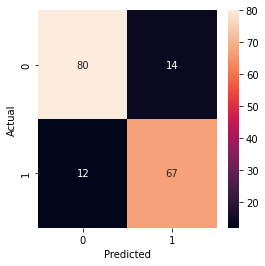

In [57]:
lgconfmat = confusion_matrix(ytest, ypred)

plt.figure(figsize = (4, 4))
sns.heatmap(lgconfmat, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [58]:
TN, FP, FN, TP = confusion_matrix(ytest, ypred).ravel()
print(f'True Positives = {TP}')
print(f'False Positives = {FP}')
print(f'True Negatives = {TN}')
print(f'False Negatives = {FN}')

True Positives = 67
False Positives = 14
True Negatives = 80
False Negatives = 12


From our ANN model, we observe that out of 173 predictions made, we are wrong 26 times and correct 147 times which is approximately 85% given by the model's accuracy. We obtain very similar accuracy level from the ANN model as compared to the logistic regression model. 